In [68]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

file_array = os.listdir('../training_sets_nudge')
def get_datasets():
    X_trains, X_tests, y_trains, y_tests = [],[],[],[]
    for i in range(len(file_array)):
        df = pd.read_csv("../training_sets_nudge/"+file_array[i])
        df = df.drop(columns=["time"])
        
        n = len(df)
        label_df = []
        data_df = df.iloc[:-1]
        
        temp_df = df['x'].iloc[1:]
        
        for i in range(n-1):
            if data_df['x'][i] < temp_df.get(i+1):
                label_df.insert(i, 1) #right 
            else:
                label_df.insert(i, 0) #left

        X = data_df
        y = pd.Series(data=label_df, name="direction")
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90)
        
        X_trains.append(X_train)
        X_tests.append(X_test)
        y_trains.append(y_train)
        y_tests.append(y_test)
    
    return X_trains, X_tests, y_trains, y_tests
    

from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(random_state=50)

X_trains, X_tests, y_trains, y_tests = get_datasets()


18


In [74]:
import shap
shap.initjs()

from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(random_state=50)

for i in range(len(X_trains)):  
    reg.fit(X_trains[i], y_trains[i])
    
for i in range(len(X_tests)):  
    (print("{:.2f}%".format(reg.score(X_tests[i], y_tests[i]))))

0.98%
0.60%
0.78%
0.94%
0.99%
0.99%
0.99%
0.96%
0.99%
0.98%
0.99%
0.99%
1.00%
0.92%
1.00%
0.99%
0.99%
0.99%


In [77]:
X_train_summary = shap.kmeans(X_trains[0], 10)

#single prediction
explainer = shap.KernelExplainer(reg.predict, X_train_summary)
shap_values = explainer.shap_values(X_tests[0].iloc[0, :])

shap.force_plot(explainer.expected_value, shap_values, X_tests[0].iloc[0, :])

In [78]:
shap_values50 = explainer.shap_values(X_tests[0], nsamples=100)
shap.force_plot(explainer.expected_value, shap_values50, X_tests[0])

100%|██████████| 600/600 [00:05<00:00, 111.72it/s]


100%|██████████| 600/600 [00:05<00:00, 111.58it/s]


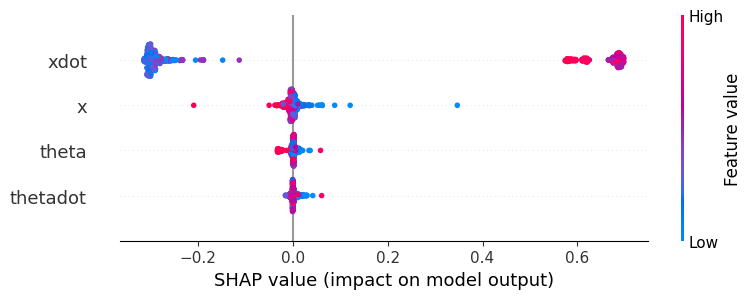

In [79]:

shap_values = explainer.shap_values(X_tests[0])
shap.summary_plot(shap_values, X_tests[0])